# 📊 Retail Sales Analysis — Summary Report

This report summarizes the main findings from the analysis of the retail sales dataset.
The focus is on identifying:

The best- and worst-selling products

The top- and bottom-performing stores

A cross-analysis between top products and stores to understand how each contributes to total revenue

Actionable insights to improve commercial performance

The data was processed in previous stages: data cleaning, EDA, and the creation of condensed metrics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

prod_rank = pd.read_csv("../data/product_rank.csv")
store_rank = pd.read_csv("../data/store_rank.csv")
cross_table = pd.read_csv("../data/cross_table.csv")
transactions = pd.read_csv("../data/Transactions.csv", parse_dates=["Date"])

## 🥇 Products Analysis

Here you are going to see the ranking of products by total revenue and Pareto's graphic to identify those products that contributes to the business.

C:\Users\crist\AppData\Local\Temp\ipykernel_18628\2630997374.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prod_rank_sorted["ProductName"], rotation=90)


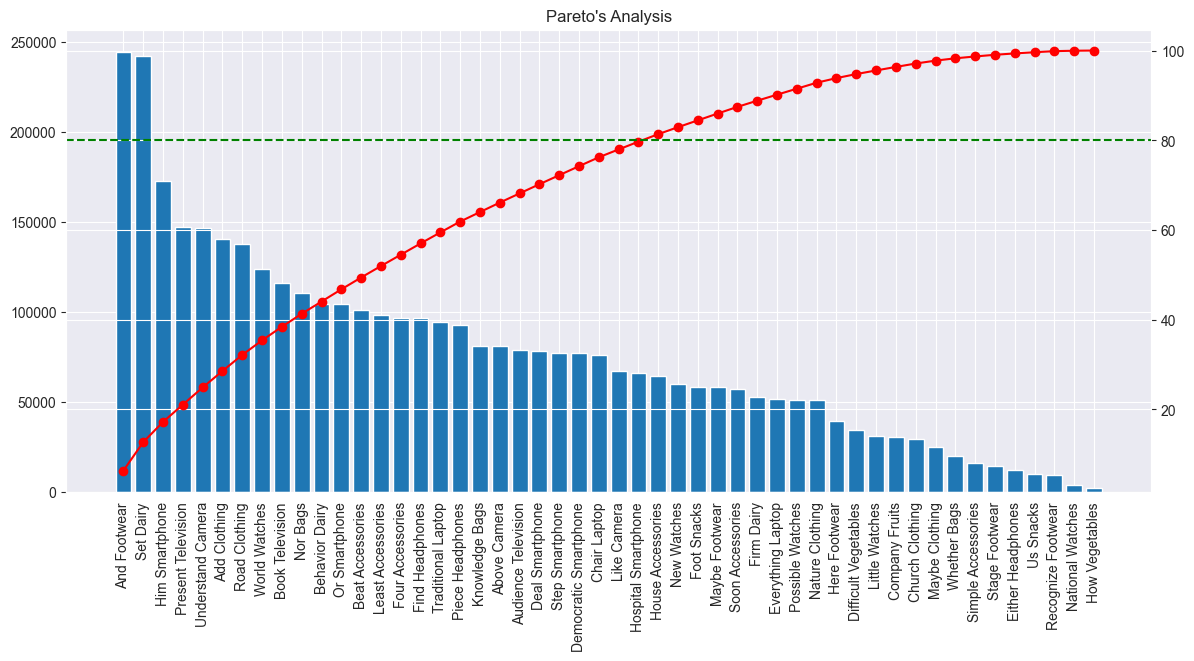

In [3]:
prod_rank_sorted = prod_rank.sort_values("revenue", ascending=False).reset_index(drop=True)
prod_rank_sorted["pct"] = prod_rank_sorted["revenue"] / prod_rank_sorted["revenue"].sum() * 100
prod_rank_sorted["cum_pct"] = prod_rank_sorted["pct"].cumsum()

fig, ax1 = plt.subplots(figsize=(14,6))
ax1.bar(prod_rank_sorted["ProductName"], prod_rank_sorted["revenue"])
ax1.set_xticklabels(prod_rank_sorted["ProductName"], rotation=90)
ax2 = ax1.twinx()
ax2.plot(prod_rank_sorted["cum_pct"], color="red", marker="o")
ax2.axhline(80, linestyle="--", color="green")
plt.title("Pareto's Analysis")
plt.show()

Pareto analysis shows that 80% of the total revenue comes from small group of products.
According to the 80% cumulative line, roughly the top ~12–15 products are responsible for 80% of total revenue.
* The first 2 products generate significantly more revenue than the rest, and represents 15-20% of total revenue.
*After the top 20 items, the revenue drops sharply.

## 🏬 Store Analysis

Here you can see stores with the highest and lowest revenue.

C:\Users\crist\AppData\Local\Temp\ipykernel_18628\2451440091.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_rank_sorted, x="StoreID", y="revenue", palette="viridis")


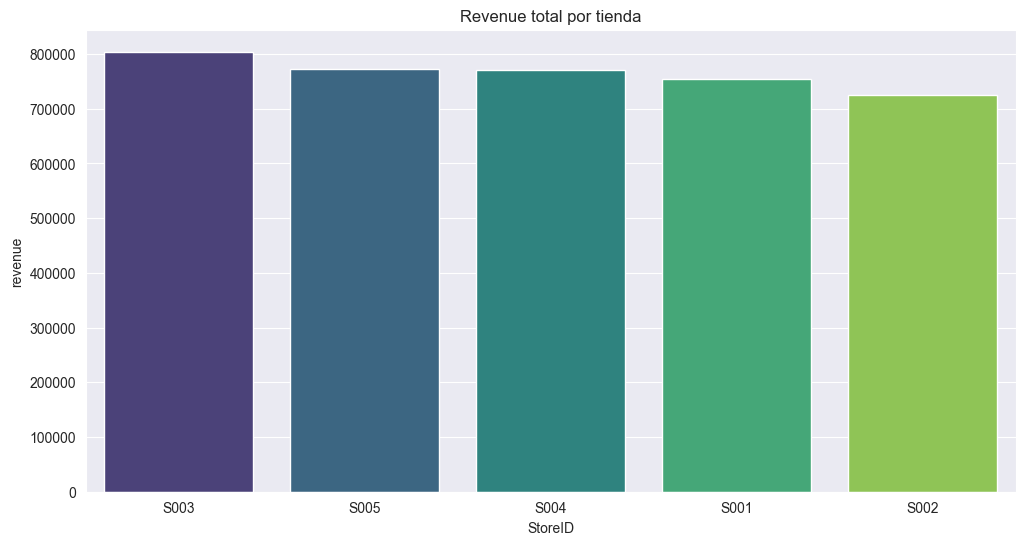

In [4]:
store_rank_sorted = store_rank.sort_values("revenue", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=store_rank_sorted, x="StoreID", y="revenue", palette="viridis")
plt.title("Revenue total por tienda")
plt.show()

## 🔍 Cross Analysis: Stores vs Top Products